In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!gdown 'https://drive.usercontent.google.com/download?id=1Lvt4ERQBIMS8OesQFxTOnzW-scSmBwa1&export=download&confirm=t' -O features.csv

Downloading...
From: https://drive.usercontent.google.com/download?id=1Lvt4ERQBIMS8OesQFxTOnzW-scSmBwa1&export=download&confirm=t
To: /content/features.csv
100% 98.8M/98.8M [00:00<00:00, 188MB/s]


# Read data

In [ ]:
drive_path='/content/drive/MyDrive/ML/dataset/features.csv'
feat_path='features.csv'
dataset = pd.read_pickle(feat_path)

In [ ]:
dataset

transcript  accent gender  \
0                         چرا این‌‌‌‌طور فکر می‌‌‌‌کنی؟   فارسی   male   
1       همیشه من و تو راجع به آن با هم صحبت کرده‌‌‌‌ایم   فارسی   male   
2                دنیا در حال گذار به‌‌‌‌سمت پایداری است   فارسی   male   
3      شاخصی که باید عملکرد تسلا را با آن اندازه بگیریم   فارسی   male   
4     باید تعداد واقعاً غیرقابل‌‌‌‌تصوری باتری تولید...   فارسی   male   
...                                                 ...     ...    ...   
6037  تا روی آن بنشیند و آن را گرم نگهدارد تا جوجه ب...  فارسی    male   
6038  یک روز تخم شکست و جوجه عقاب از آن بیرون آمد. ج...  فارسی    male   
6039  و طولی نکشید که جوجه عقاب باور کرد که چیزی جز ...  فارسی    male   
6040  او زندگی و خانواده‌اش را دوست داشت اما چیزی از...  فارسی    male   
6041      تا این که یک روز که داشت در مزرعه بازی می کرد  فارسی    male   

          tone                                           features  
0     question  [[-1587.9373, -1343.3871, -1029.7144, -923.854...  
1       normal  [[-1623.5153, -1469.9537, -1087.6764, -952.849...  
2       normal  [[-1616.7151, -1464.7935, -1085.4702, -954.183...  
3       normal  [[-1576.1211, -1451.0182, -1081.023, -950.9877...  
4       normal  [[-1599.5532, -1451.3506, -1078.1669, -950.614...  
...        ...                                                ...  
6037    normal  [[-1490.5542, -1490.5542, -1290.5487, -1073.22...  
6038    normal  [[-1492.3177, -1492.3177, -1290.1709, -1027.53...  
6039    normal  [[-1514.8813, -1514.8813, -1282.8203, -1072.36...  
6040    normal  [[-1517.718, -1517.718, -1286.333, -1068.3036,...  
6041    normal  [[-1504.018, -1504.018, -1292.8875, -980.1504,...  

[6042 rows x 5 columns]

In [ ]:
idx=2
fi=dataset.features[idx]
print(f'feature[{idx}] is {fi}\nthe feature shape is {fi.shape}\nCorresponding text is: "{dataset.transcript[0]}"')

feature[2] is [[-1.6167151e+03 -1.4647935e+03 -1.0854702e+03 ... -5.9017456e+02
  -5.8978680e+02 -6.6748108e+02]
 [ 0.0000000e+00  1.2617649e+02  1.9849902e+02 ...  1.9304018e+02
   1.6766861e+02  1.5296564e+02]
 [ 0.0000000e+00  1.8593151e+01 -3.8883202e+01 ... -1.6851089e+02
  -1.2271493e+02 -8.6904922e+01]
 ...
 [ 0.0000000e+00  1.1316574e+00 -1.3192756e+01 ... -2.6232359e+01
  -3.1396675e+01 -3.5035824e+01]
 [ 0.0000000e+00 -9.0569572e+00  1.1479719e+01 ...  2.6006969e+01
   1.4964893e+01  6.6365128e+00]
 [ 0.0000000e+00 -1.5092021e+01 -6.4229527e+00 ... -4.0772324e+01
  -4.1107777e+01 -3.9023754e+01]]
the feature shape is (13, 176)
Corresponding text is: "چرا این‌‌‌‌طور فکر می‌‌‌‌کنی؟"


# Preprocess

In [ ]:
dataset['gender'] = dataset['gender'].replace({'مرد': 'male'})
dataset['accent'] = dataset['accent'].replace({'farsi': 'فارسی'})
dataset['tone'] = dataset['tone'].replace(['nomal', 'nortmal'], 'normal')
dataset['tone'] = dataset['tone'].replace({'impreative': 'imperative'})
dataset['tone'] = dataset['tone'].replace({'exclamative': 'exclamatory'})
dataset['tone'] = dataset['tone'].replace({'quenstion': 'question'})
dataset['tone'] = dataset['tone'].replace({'incomplet': 'incomplete'})

# Shuffle data

In [ ]:
shuffled_dataset = dataset.sample(frac=1, random_state=42)
shuffled_dataset

transcript accent  gender  \
3070   کتاب گفت اولین جادویی که به تو یاد بدهم جادوی...  فارسی    male   
1820                او درحالی که هنوز مرا گرفته بود گفت  فارسی    male   
4918           خداحافظ و اینک راز من که بسیار ساده است.  فارسی    male   
3414  در سال ۱۸۷۲ در نشست ادیبان و زبان شناسان اروپا...  فارسی    male   
3950  او پس از مدتی موفق شد که به‌عنوان بازرس ثبت اخ...  فارسی    male   
...                                                 ...    ...     ...   
3772  از این جهت که سیم‌های آن در اثر ارتعاش تولید ص...  فارسی    male   
5191       ما دستگاه های غول پیکر نابود کننده تجربه ایم  فارسی    male   
5226    درختان سبز هستند و سایهای دلپذیر ایجاد می‌کنند.  فارسی   male    
5390  سیب زمینی، یک خوراکی طلایی است که در سراسر جها...  فارسی   male    
860   گذشته درس عبرت تو ، حال هدیه تو و آینده انگیزه...  فارسی  female   

            tone                                           features  
3070      normal  [[-1537.9152, -1537.9152, -1537.9152, -1537.91...  
1820  incomplete  [[-738.70715, -719.5231, -729.8326, -725.25684...  
4918      normal  [[-1503.7782, -1503.7782, -1503.7782, -1242.36...  
3414      normal  [[-1748.1865, -1177.351, -864.0424, -740.23206...  
3950      normal  [[-1505.4216, -1451.873, -1080.2045, -949.1842...  
...          ...                                                ...  
3772      normal  [[-639.125, -567.7287, -561.5664, -568.7169, -...  
5191      normal  [[-1527.0172, -1200.8486, -1013.4903, -907.588...  
5226      normal  [[-780.2288, -419.2633, -312.74115, -289.88757...  
5390      normal  [[-662.3709, -389.33963, -313.3456, -295.18683...  
860       normal  [[-1425.8813, -1169.5923, -985.8105, -897.6363...  

[6042 rows x 5 columns]

In [ ]:
gender_label = [f.strip().lower()  for f in shuffled_dataset['gender']]
accent_label = [f.strip()  for f in shuffled_dataset['accent']]
tone_label = [f.strip().lower()  for f in shuffled_dataset['tone']]
len_label = ['short' if f.shape[1]<160 else 'medium' if f.shape[1]<250 else 'long'  for f in shuffled_dataset['features']]


# Mean along time for each audio feature matrix

MFCCs are computed for each short-time frame of an audio signal, resulting in a time-series of MFCCs for the entire signal. The mean operation is used here to aggregate information across time and condense the temporal information into a fixed-size feature vector. Other aggregation methods could include taking the median, sum, standard deviation, or other statistical measures.

In [ ]:
mean_features = [np.mean(feature, axis=1) for feature in shuffled_dataset['features']]
print(mean_features[0].shape)

(13,)


# Normalization

1. Scale Consistency:

Different features may have different scales or units. For example, in the case of audio features, the amplitude of one feature might be on a much larger scale than another.

Clustering algorithms, such as K-Means, are sensitive to the scale of features. Normalizing features helps ensure that each feature contributes equally to the clustering process.

2. Convergence Speed:

Some optimization algorithms used by clustering methods converge faster when features are on a similar scale. This is particularly important for algorithms like K-Means, where the distance between data points is a crucial factor.

3. Improved Interpretability:

Normalized features make it easier to interpret the relative importance of each feature in the clustering process.
Without normalization, features with larger scales may dominate the clustering results.

In [ ]:
# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(mean_features)

# PCA

1. High-Dimensional Data:

If your original feature space has a high dimensionality, PCA can help reduce it, making subsequent clustering algorithms more efficient and potentially improving their performance.
2. Visualization:

If visualization is important for understanding the structure of your data or presenting results, PCA can be valuable for reducing dimensions to 2D or 3D.
3. Noise Reduction:

PCA tends to retain the most significant information and discard noise. If your dataset contains noise or irrelevant features, PCA can help focus on the essential components.

In [ ]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)
features_pca = pca.fit_transform(features_standardized)

## Labels Visualization

### Gender visualization

Text(0.5, 1.0, 'Genders Distribution')

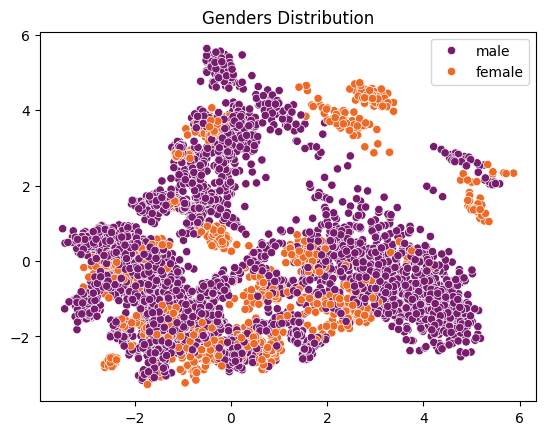

In [ ]:
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=gender_label, palette='inferno')
plt.title('Genders Distribution')

### Accent visualization

Text(0.5, 1.0, 'Accent Distribution')

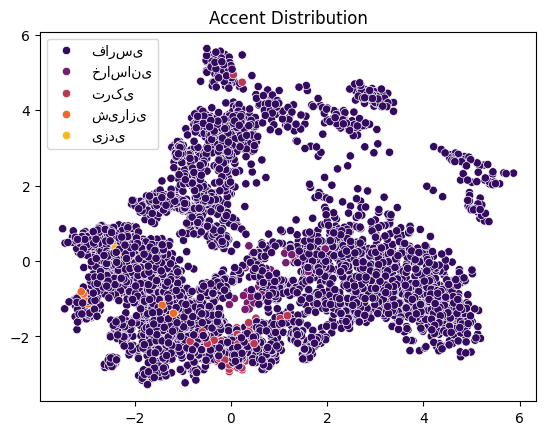

In [ ]:
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=accent_label, palette='inferno')
plt.title('Accent Distribution')

### Tone Visualization





Text(0.5, 1.0, 'Tone Distribution')

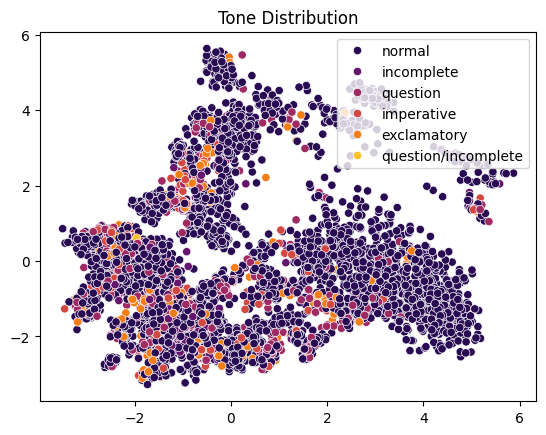

In [ ]:
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=tone_label, palette='inferno')
plt.title('Tone Distribution')

### length visualization

Text(0.5, 1.0, 'Voice Length Distribution')

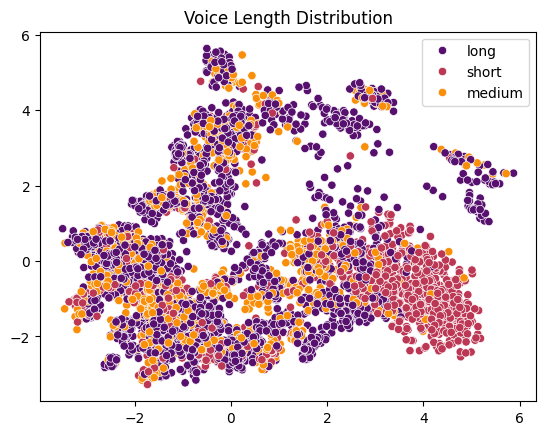

In [ ]:
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=len_label, palette='inferno')
plt.title('Voice Length Distribution')

# K-means

The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It ranges from -1 to 1, where a high value indicates well-separated clusters.

Note: The silhouette score is a good indicator of the separation between clusters, but it may not perform well if the true number of clusters is unknown.

In [ ]:
def k_means_silhouette(features, k):
    kmeans = KMeans(n_clusters=k, n_init=10,init='k-means++')
    kmeans_labels = kmeans.fit_predict(features)
    silhouette_avg = silhouette_score(features, kmeans_labels)
    return kmeans_labels, silhouette_avg

In [ ]:
k_clusters_dict = {}

for i in range(2, 31):
    clusters, score, centers = k_means_silhouette(features_pca, i)
    k_clusters_dict[i] = (clusters, score)

In [ ]:
dict(sorted(k_clusters_dict.items(), key=lambda item: item[1][1], reverse=True))

{4: (array([2, 0, 2, ..., 3, 3, 0], dtype=int32), 0.45950472840919815),
 5: (array([3, 4, 4, ..., 1, 1, 2], dtype=int32), 0.4455184390807299),
 14: (array([ 7,  0,  3, ...,  2,  8, 12], dtype=int32), 0.43988531479649745),
 13: (array([ 1,  8,  2, ...,  0,  4, 10], dtype=int32), 0.43213432606169333),
 3: (array([0, 1, 0, ..., 2, 2, 1], dtype=int32), 0.430277486454689),
 16: (array([ 2,  6,  3, ...,  1, 11,  5], dtype=int32), 0.43019939893903586),
 15: (array([ 5, 12, 14, ...,  4,  1, 10], dtype=int32), 0.4297130913784896),
 23: (array([ 5, 10,  0, ...,  1,  8,  7], dtype=int32), 0.42763724568621114),
 12: (array([8, 6, 1, ..., 5, 0, 2], dtype=int32), 0.42084356893388253),
 20: (array([ 1, 11,  4, ..., 16,  6,  8], dtype=int32), 0.41897154992275487),
 17: (array([ 2,  4,  3, ..., 16, 10,  7], dtype=int32), 0.41752073659126737),
 7: (array([6, 5, 0, ..., 4, 1, 3], dtype=int32), 0.4117684528621015),
 11: (array([6, 7, 5, ..., 4, 8, 3], dtype=int32), 0.41051488452396834),
 6: (array([5, 4, 

## plot k-silhouette

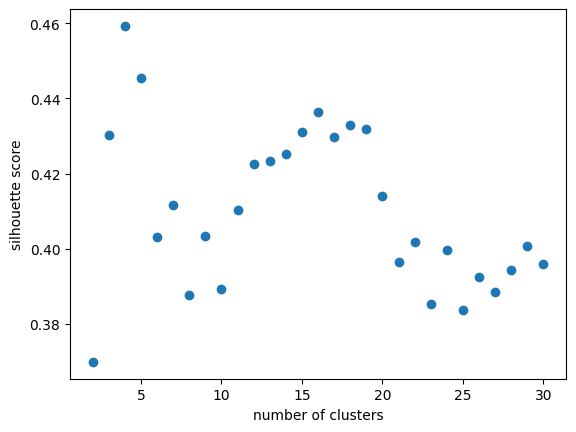

In [ ]:
plt.plot(k_clusters_dict.keys(), [x[1] for x in k_clusters_dict.values()], 'o')
plt.xlabel("number of clusters")
plt.ylabel("silhouette score")
plt.show()

## k = 4 (best number of components according to silhouette score)

cluster 0: [1820, 2244, 23, 3559, 79, 808, 3360, 811, 3593, 889, 3995, 3575, 2850, 2655, 3318, 84, 2644, 4660, 37, 4663, 3625, 3982, 3268, 93, 4011, 879, 3660, 3669, 3319, 2168, 1176, 31, 2412, 1600, 4010, 5086, 2654, 80, 2629, 4987, 3328, 2653, 3664, 4020, 3641, 3614, 1860, 794, 5090, 3270, 50, 2276, 1175, 2640, 3332, 1803, 4685, 3346, 800, 4977, 893, 3558, 3589, 4024, 3583, 4653, 17, 3678, 1557, 3322, 1181, 14, 1844, 2145, 65, 1186, 5081, 5106, 88, 1825, 4983, 2439, 3655, 3580, 2163, 4019, 3288, 2314, 5078, 805, 3276, 4652, 2638, 15, 2187, 3630, 3599, 8, 33, 2164, 44, 2615, 63, 1144, 1566, 2330, 3563, 2409, 3601, 3347, 1168, 1170, 810, 881, 2441, 3382, 1562, 2195, 4661, 1595, 1129, 1561, 812, 5113, 3680, 2622, 2338, 1554, 1158, 2170, 2348, 3386, 1599, 3311, 2347, 2845, 2275, 865, 3618, 1183, 3308, 29, 3377, 2167, 90, 69, 877, 3994, 4003, 2440, 4694, 2154, 2851, 3985, 3361, 1831, 4037, 807, 896, 2329, 5123, 3321, 2254, 2337, 1161, 2344, 3997, 1559, 1569, 2627, 2333, 1172, 1586, 3323, 

Text(0.5, 1.0, '4-Means Clustering (silhouette0.45950472840919815)')

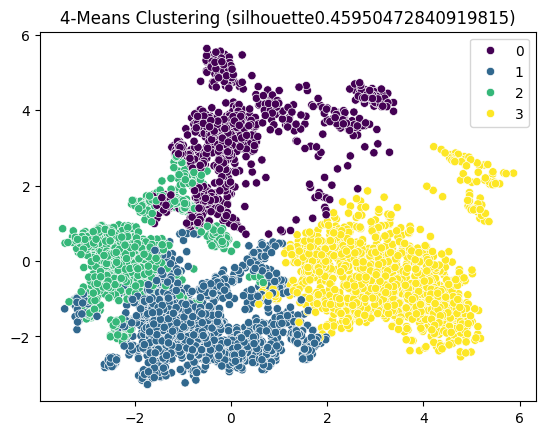

In [ ]:
k=4
for i in range(k):
    voices = shuffled_dataset.iloc[k_clusters_dict[k][0] == i]
    print(f'cluster {i}: {list(voices.index)}')

sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=k_clusters_dict[k][0], palette='viridis')
plt.title(f'{k}-Means Clustering (silhouette{k_clusters_dict[k][1]})')

## k = 3

cluster 0: [3070, 4918, 3414, 228, 1485, 4909, 2518, 676, 4405, 3107, 3755, 4864, 401, 2486, 3114, 6034, 2505, 2481, 538, 1197, 4078, 4237, 465, 681, 3914, 4959, 3207, 4643, 4162, 371, 408, 167, 6010, 994, 2598, 599, 1022, 3837, 1888, 561, 2543, 296, 3838, 2860, 221, 4233, 4870, 4416, 5993, 576, 3481, 3728, 4845, 1323, 3796, 3710, 2892, 4148, 4738, 710, 1934, 2594, 3208, 4299, 2057, 3130, 4486, 4118, 3075, 2897, 3045, 3784, 4541, 3892, 4105, 3127, 4296, 4303, 2770, 4961, 476, 1789, 1973, 586, 4943, 4220, 4771, 2476, 4890, 622, 319, 156, 5041, 254, 2351, 1728, 2600, 2498, 3926, 346, 177, 712, 2552, 2809, 308, 263, 3703, 4381, 1483, 1319, 2859, 4168, 1496, 3929, 1480, 501, 4539, 1665, 233, 157, 1654, 4602, 472, 5979, 4291, 439, 1221, 2763, 1345, 1468, 4589, 4819, 969, 1737, 3757, 2008, 3805, 2742, 696, 553, 5015, 1509, 4795, 1514, 4703, 3217, 4600, 1876, 705, 1694, 706, 1921, 4310, 2750, 3793, 469, 3454, 1370, 3100, 239, 199, 1729, 1310, 5207, 3035, 1881, 2576, 101, 4559, 1215, 2025, 691

Text(0.5, 1.0, '3-Means Clustering (silhouette0.43034025280445753)')

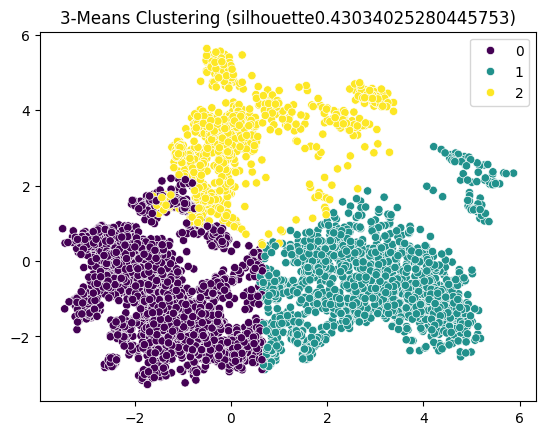

In [ ]:
# print voice numbers belonging to each cluster (to find the common feature of each cluster)
k=3
for i in range(k):
    voices = shuffled_dataset.iloc[k_clusters_dict[k][0] == i]
    print(f'cluster {i}: {list(voices.index)}')

sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=k_clusters_dict[k][0], palette='viridis')
plt.title(f'{k}-Means Clustering (silhouette{k_clusters_dict[k][1]})')

## k = 17

cluster 0: [23, 3559, 808, 811, 3593, 3995, 3575, 37, 3982, 3268, 4011, 1176, 31, 4010, 5086, 4020, 794, 5090, 3270, 50, 1175, 800, 3558, 3589, 4024, 3583, 17, 1181, 14, 65, 1186, 5081, 5106, 88, 4983, 3580, 4019, 5078, 805, 3276, 15, 33, 44, 63, 1144, 3563, 1168, 1170, 810, 1129, 812, 5113, 1158, 1183, 29, 90, 69, 3994, 4003, 3985, 4037, 807, 5123, 1161, 3997, 1172, 3980, 71, 1142, 47, 1163, 3973, 4998, 3588, 30, 2263, 3574, 809, 5091, 5074, 1173, 5118, 5117, 798, 3970, 2264, 3289, 61, 790, 5120, 3571, 5110, 803, 43, 95, 5000, 4986, 3285, 70, 3560, 5105, 3570, 5098, 3971, 5084, 5082, 5100, 51, 5077, 802, 62, 3585, 68, 3592, 45, 1187, 5087, 1157, 5002, 4999, 19, 3264, 2846, 1149, 1174, 1151, 1164, 1135, 4025, 3578, 3274, 4006, 3269, 4993, 85, 4985, 1162, 5121, 4035, 4012, 25, 5101, 32, 5083, 5111, 3295, 818, 1180, 817, 3979, 52, 4001, 3296, 1146, 801, 24, 3988, 56, 1137, 3977, 81, 3286, 3290, 2908, 4004, 3262, 58, 76, 796, 5095, 3567, 4002, 5096, 1130, 48, 3275, 2910, 18, 0, 816, 1159,

Text(0.5, 1.0, '17-Means Clustering (silhouette0.42977872301735426)')

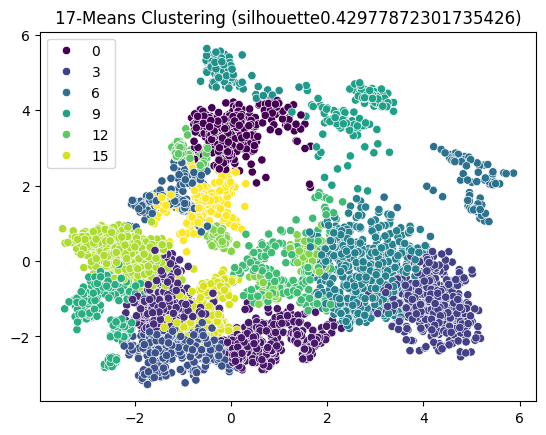

In [ ]:
k=17
for i in range(k):
    voices = shuffled_dataset.iloc[k_clusters_dict[k][0] == i]
    print(f'cluster {i}: {list(voices.index)}')

sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=k_clusters_dict[k][0], palette='viridis')
plt.title(f'{k}-Means Clustering (silhouette{k_clusters_dict[k][1]})')

# Agglomerative Hierarchical

In [ ]:
def agg_clustering(n,features, plotting=False):
    agg_cluster = AgglomerativeClustering(n_clusters=n, metric='euclidean', linkage='ward')
    agg_labels = agg_cluster.fit_predict(features)
    agg_silhouette = silhouette_score(features, agg_labels)

    if plotting:
        sns.scatterplot(x=features[:, 0], y=features[:, 1], hue=agg_labels, palette='viridis')
        plt.title(f'Agglomerative Clustering (silhouette: {agg_silhouette})')
        plt.show()
        linkage_matrix = linkage(features, method='ward')
        dendrogram(linkage_matrix)
    return agg_labels, agg_silhouette


In [ ]:
agg_clusters_dict = {}

for i in range(2, 31):
    agg_labels, sil_score = agg_clustering(i, features_pca)
    agg_clusters_dict[i] = (agg_labels, sil_score)

In [ ]:
dict(sorted(agg_clusters_dict.items(), key=lambda item: item[1][1], reverse=True))

{6: (array([4, 1, 3, ..., 2, 2, 5]), 0.4436856049775088),
 4: (array([0, 1, 0, ..., 2, 2, 1]), 0.43989881630013977),
 5: (array([4, 0, 3, ..., 2, 2, 0]), 0.4305232834639038),
 20: (array([ 9, 18,  1, ...,  0,  0, 14]), 0.4197148810943433),
 19: (array([ 0, 18,  4, ...,  1,  1, 14]), 0.4155790615163309),
 17: (array([ 2,  8,  4, ...,  3,  3, 14]), 0.41445510205928865),
 14: (array([5, 8, 4, ..., 7, 7, 6]), 0.413355602625055),
 16: (array([ 5,  8,  4, ...,  3,  3, 14]), 0.4131531719548998),
 18: (array([ 2,  8,  4, ...,  1,  1, 14]), 0.41236549197527),
 15: (array([ 5,  8,  4, ...,  7,  7, 14]), 0.4065403834474751),
 13: (array([0, 8, 4, ..., 7, 7, 6]), 0.4033167155016179),
 21: (array([ 9, 18,  0, ...,  4,  4, 14]), 0.40313926655373067),
 3: (array([0, 1, 0, ..., 2, 2, 1]), 0.4025812781730724),
 7: (array([4, 1, 3, ..., 0, 0, 2]), 0.4006733966673259),
 12: (array([1, 8, 4, ..., 7, 7, 6]), 0.39909804133702637),
 11: (array([1, 8, 4, ..., 7, 7, 0]), 0.39303524069864404),
 8: (array([4, 0,

## plot n-silhouette

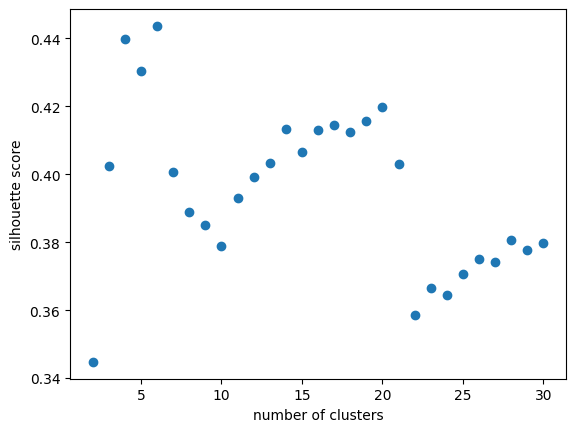

In [ ]:
plt.plot(agg_clusters_dict.keys(), [x[1] for x in agg_clusters_dict.values()], 'o')
plt.xlabel("number of clusters")
plt.ylabel("silhouette score")
plt.show()

## n = 6 (best number of components according to silhouette score)

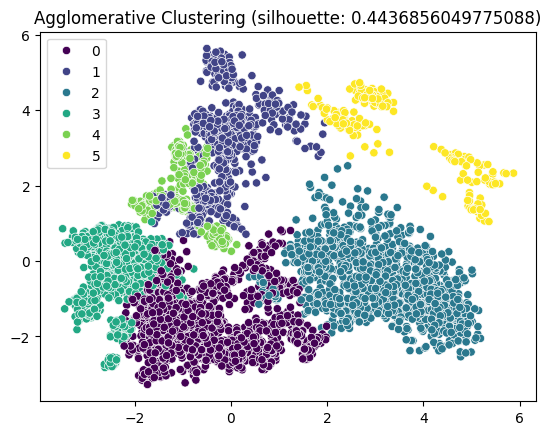

(array([4, 1, 3, ..., 2, 2, 5]), 0.4436856049775088)

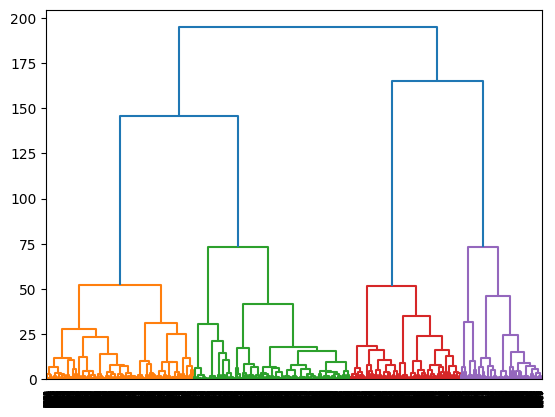

In [ ]:
# Agglomerative Hierarchical Clustering
n = 6

agg_clustering(n,features_pca, plotting=True)

## n = 3

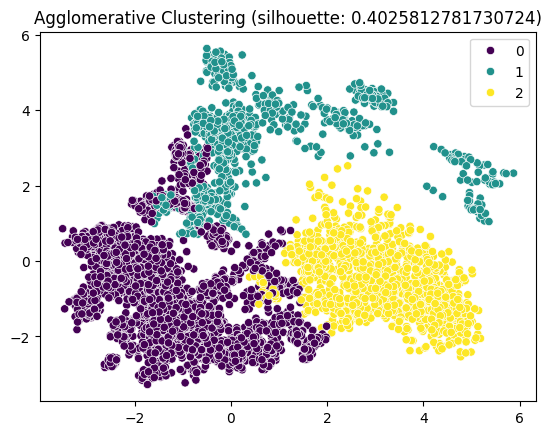

0.4025812781730724

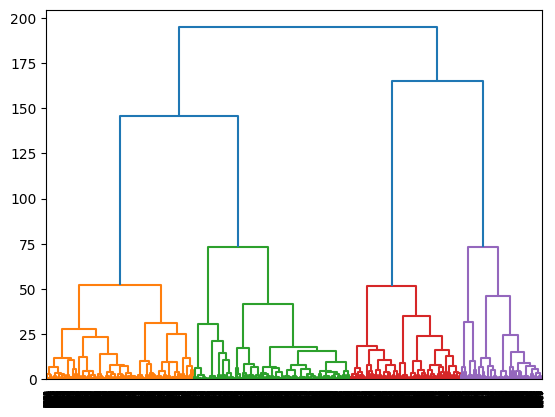

In [ ]:
# Agglomerative Hierarchical Clustering
n=3

agg_clustering(n,features_pca, plotting=True)

## n = 14

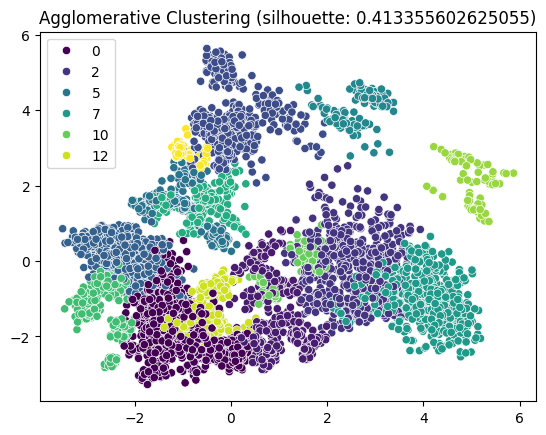

(array([5, 8, 4, ..., 7, 7, 6]), 0.413355602625055)

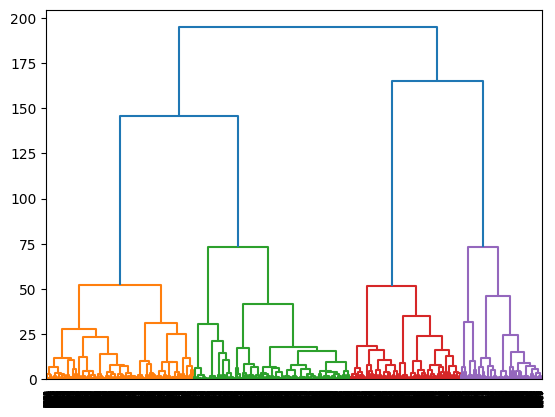

In [ ]:
# Agglomerative Hierarchical Clustering
n = 14

agg_clustering(n,features_pca, plotting=True)

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

**DBSCAN** is a density-based clustering algorithm that partitions data into clusters based on the density of data points in the feature space. Unlike traditional clustering algorithms that assume clusters are compact and well-separated, DBSCAN can discover clusters of arbitrary shapes and effectively identify noise points.

Benefits:

1. **Robust to Shape and Size**:
DBSCAN is capable of identifying clusters with irregular shapes and varying sizes, making it suitable for datasets where clusters may have non-uniform density distributions.

2. **Automatically Handles Noise**:
DBSCAN automatically labels data points as noise, which can be valuable in real-world scenarios where noisy data or outliers are common. It distinguishes between dense regions and sparse regions.

3. **No Need for Specifying the Number of Clusters**:
Unlike k-means or hierarchical clustering, DBSCAN does not require you to specify the number of clusters beforehand. It dynamically adjusts to the data and identifies the appropriate number of clusters.

In [ ]:
def db_clustering( features,eps=0.5,min_samples=30):
  dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')

  # Fit and predict clusters
  dbscan_labels = dbscan.fit_predict(features)
  db_silhouette = silhouette_score(features, dbscan_labels)

  # Visualize the clusters
  sns.scatterplot(x=features[:, 0], y=features[:, 1], hue=dbscan_labels, palette='viridis')
  plt.title(f'DBSCAN Clustering silhouette: {db_silhouette}')
  plt.show()

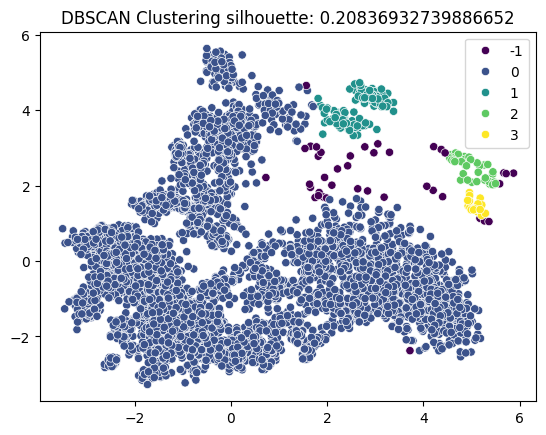

In [ ]:
db_clustering(features_pca[:,:2])

# t-SNE

**t-SNE, or t-Distributed Stochastic Neighbor Embedding**, is a dimensionality reduction technique that excels in capturing non-linear relationships within high-dimensional data. Unlike linear methods such as PCA, t-SNE focuses on preserving the pairwise similarities between data points, making it particularly effective for visualizing complex structures in your data.

**Key Considerations for t-SNE:**

1. Non-Linearity:
t-SNE is well-suited for datasets with intricate non-linear structures. It can reveal hidden patterns and relationships that may not be apparent in the original high-dimensional space. This makes it a valuable tool when dealing with complex data representations.

2. Global and Local Structure:
t-SNE simultaneously considers the global and local structure of the data. It tends to group similar points together, preserving local relationships, while also capturing the overall structure of the dataset. This dual focus allows it to represent both small-scale clusters and large-scale patterns.

In [ ]:
tsne = TSNE(n_components=3, perplexity=30, random_state=42)

features_tsne = tsne.fit_transform(features_standardized)

## Distribution Visualization

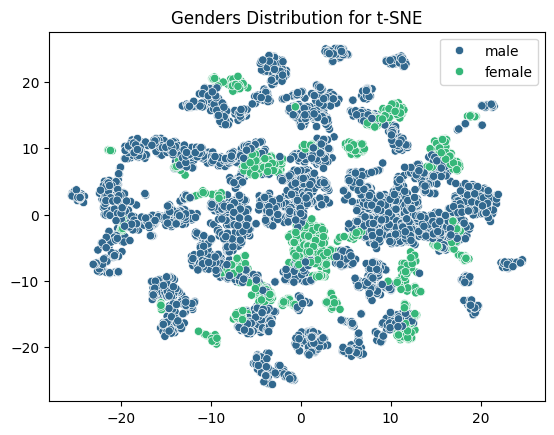

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with gender labels
label_mapping = {'male': 0, 'female': 1,}
gender_numeric = np.array([label_mapping[label] if label in label_mapping.keys() else 2 for label in gender_label])

scatter = ax.scatter(features_tsne[:, 0], features_tsne[:, 1], features_tsne[:, 2], c=gender_numeric, cmap='viridis')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Genders Distribution for 3D t-SNE')

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Gender Label')

# Show the plot
plt.show()

sns.scatterplot(x=features_tsne[:, 0], y=features_tsne[:, 1], hue=gender_label, palette='viridis')
plt.title('Genders Distribution for t-SNE')

Text(0.5, 1.0, 'Accents Distribution for t-SNE')

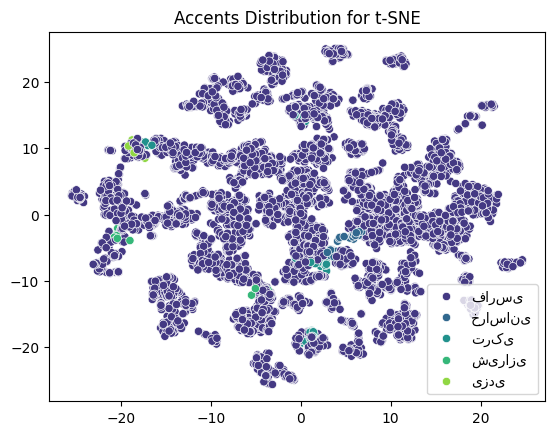

In [ ]:
sns.scatterplot(x=features_tsne[:, 0], y=features_tsne[:, 1], hue=accent_label, palette='viridis')
plt.title('Accents Distribution for t-SNE')

Text(0.5, 1.0, 'Tone Distribution for t-SNE')

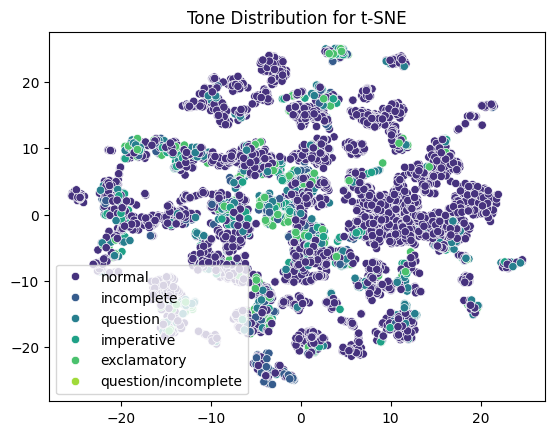

In [ ]:
sns.scatterplot(x=features_tsne[:, 0], y=features_tsne[:, 1], hue=tone_label, palette='viridis')
plt.title('Tone Distribution for t-SNE')

Text(0.5, 1.0, 'Voice Length Distribution for t-SNE')

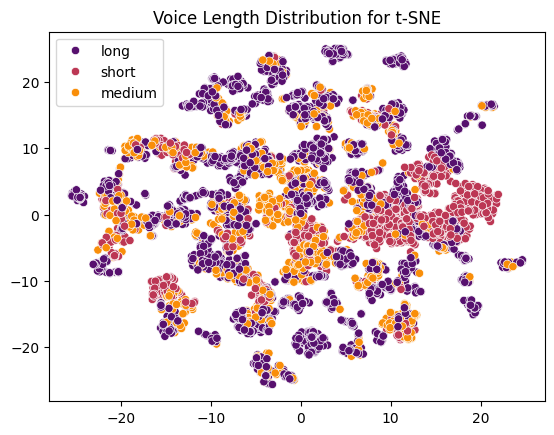

In [ ]:
sns.scatterplot(x=features_tsne[:, 0], y=features_tsne[:, 1], hue=len_label, palette='inferno')
plt.title('Voice Length Distribution for t-SNE')

## Agglomerative Hierarchical

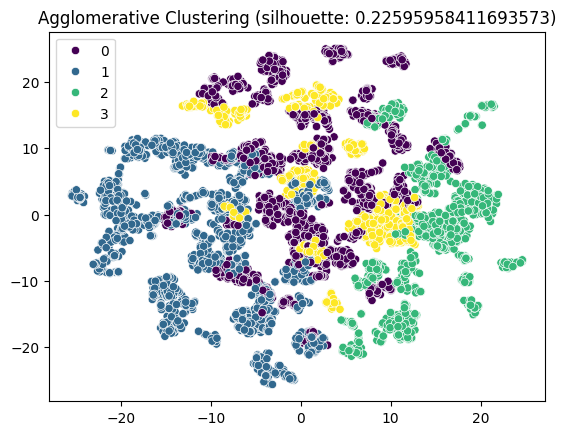

(array([3, 1, 1, ..., 2, 2, 2]), 0.22595958)

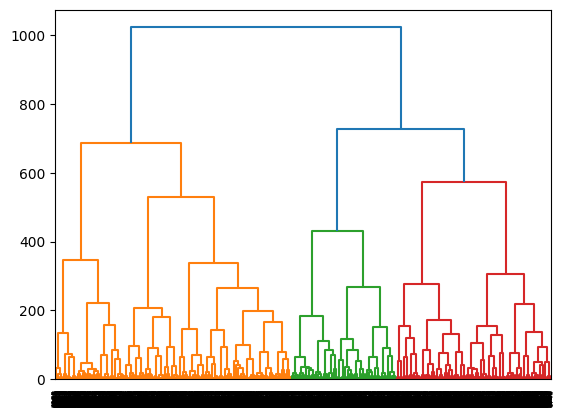

In [ ]:
# Agglomerative Hierarchical Clustering
n=4
agg_clustering(n,features_tsne,True)